# **Proposta de Trabalho - Mineração de dados**

### **Professores:** Wagner Meira Jr./Pedro Calais
### **Alunos:** Carlos Henrique Brito Malta Leão/Vinícius Alves de Faria Resende 
### **Matrículas:** 2021039794/2021039972


### **Tema:** ENEM 2022: O Impacto das Características Socioeconômicas no Desempenho dos Candidatos
### **Base de dados:** https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem


In [153]:
#Bibliotecas usadas no projeto
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

## 2. Data understanding (Entendimento dos dados)

### Resumo da Fase
A primeira fase do projeto é a "Data Understanding," que se concentra na coleta e compreensão inicial dos dados. Esta fase é essencial para estabelecer uma base sólida para análises posteriores e identificar possíveis desafios.


### Passo 1: Descrever os dados

- Nesta seção, realizamos uma análise inicial dos dados do ENEM 2022. O objetivo é coletar informações essenciais sobre o conjunto de dados e entender sua estrutura, características e qualidade. Abaixo estão os principais resultados desta fase:

- Informações Gerais dos Dados
  - Número de Entradas: O conjunto de dados possui 100.000 entradas (linhas).
  - Número de Colunas: Existem 76 colunas (variáveis) no conjunto de dados.
- Tipos de Dados
  - Dados Numéricos: O conjunto de dados contém 21 colunas com valores numéricos do tipo 'int64' e 21 colunas com valores numéricos do tipo 'float64'.
  - Dados Categóricos: Há 37 colunas com valores categóricos do tipo 'object'.
  - Dados Faltantes
- Diversas colunas apresentam dados faltantes, identificados pelo tipo 'float64'. As colunas com maior número de dados faltantes incluem 'TP_ENSINO', 'CO_MUNICIPIO_ESC', 'TP_DEPENDENCIA_ADM_ESC', e outras relacionadas às notas das provas.
- Alguns Exemplos de Colunas Importantes
  - NU_INSCRICAO: Número de inscrição dos candidatos.
  - TP_SEXO: Gênero dos candidatos (M = Masculino, F = Feminino).
  - NU_NOTA_CN, NU_NOTA_CH, NU_NOTA_LC, NU_NOTA_MT: Notas dos candidatos nas provas de Ciências da Natureza, Ciências Humanas, Linguagens e Códigos, e Matemática, respectivamente.
  - Q001, Q002, Q003, Q004: Perguntas relacionadas ao nível de escolaridade e renda dos candidatos.
  - Q025: Acesso à internet (A = Sim, B = Não).

In [154]:
# Carregando a base de dados
raw_df = pd.read_csv('MICRODADOS_ENEM_2022.csv', encoding='latin-1', sep=';', nrows=100000)

# Visualize as primeiras linhas do DataFrame para ter uma ideia inicial dos dados
raw_df.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210057943671,2022,14,M,2,2,1,1,2,1,...,B,A,A,A,A,A,A,A,A,A
1,210057516120,2022,14,M,2,1,1,1,16,1,...,E,E,B,E,B,B,E,B,E,B
2,210057280536,2022,5,F,1,2,1,1,2,1,...,A,A,A,A,A,A,C,A,A,B
3,210055724397,2022,6,M,1,3,1,1,2,1,...,B,A,A,C,A,A,C,B,B,B
4,210055097896,2022,4,M,0,3,1,1,1,1,...,A,A,A,A,A,A,B,A,A,A


In [155]:
# Verificando as informações gerais sobre o DataFrame
raw_df.info()

# Descrevendo as estatísticas básicas dos dados numéricos
raw_df.describe()

# Verificando a presença de valores nulos em cada coluna
raw_df.isnull().sum()

# Verificando as estatísticas básicas de colunas não numéricas
raw_df.describe(include='object')

# Verificando a estrutura do DataFrame
raw_df.shape

# Verificando as colunas disponíveis
raw_df.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 76 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   NU_INSCRICAO            100000 non-null  int64  
 1   NU_ANO                  100000 non-null  int64  
 2   TP_FAIXA_ETARIA         100000 non-null  int64  
 3   TP_SEXO                 100000 non-null  object 
 4   TP_ESTADO_CIVIL         100000 non-null  int64  
 5   TP_COR_RACA             100000 non-null  int64  
 6   TP_NACIONALIDADE        100000 non-null  int64  
 7   TP_ST_CONCLUSAO         100000 non-null  int64  
 8   TP_ANO_CONCLUIU         100000 non-null  int64  
 9   TP_ESCOLA               100000 non-null  int64  
 10  TP_ENSINO               33057 non-null   float64
 11  IN_TREINEIRO            100000 non-null  int64  
 12  CO_MUNICIPIO_ESC        20045 non-null   float64
 13  NO_MUNICIPIO_ESC        20045 non-null   object 
 14  CO_UF_ESC            

Index(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA',
       'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
       'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH',
       'TX_GABARITO_LC', 'TX_GABARITO_MT', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004',

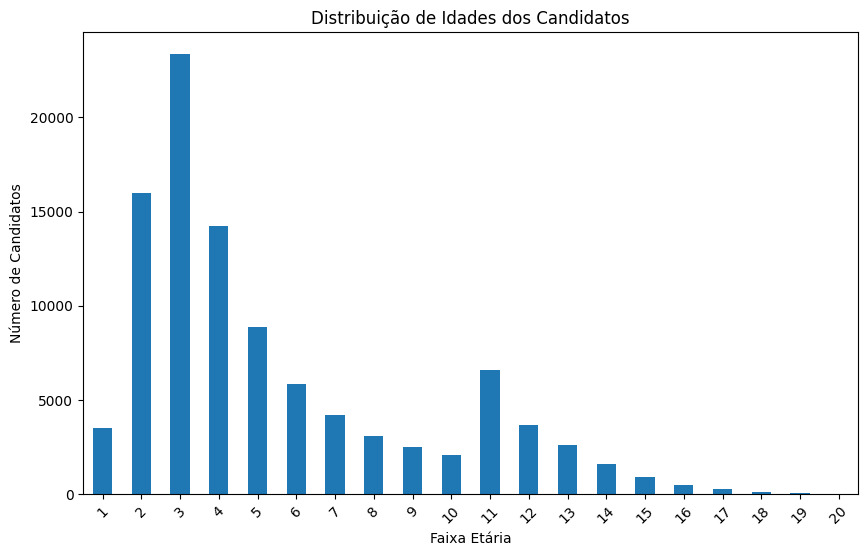

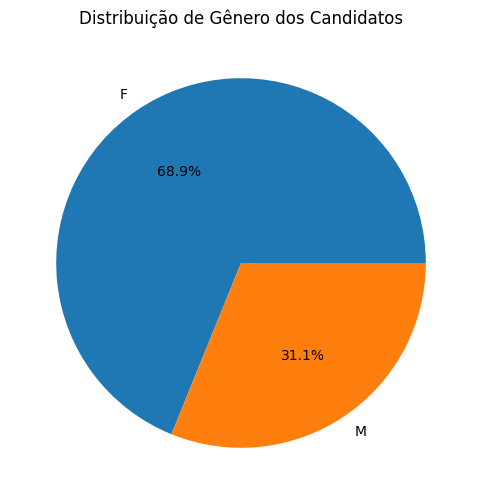

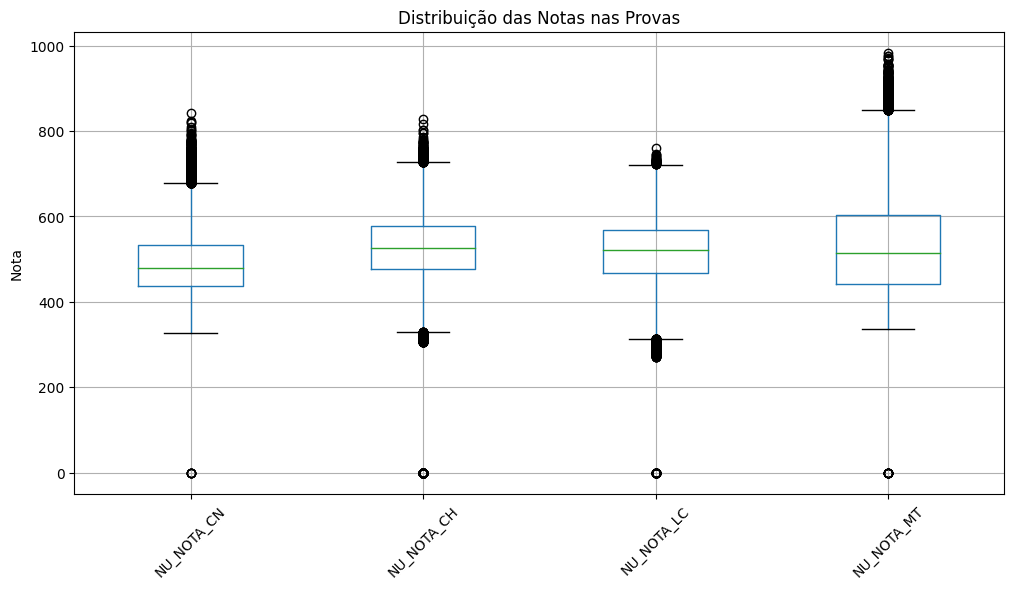

<Figure size 800x600 with 0 Axes>

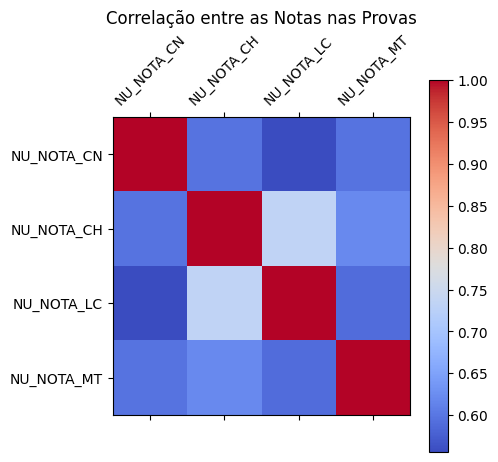

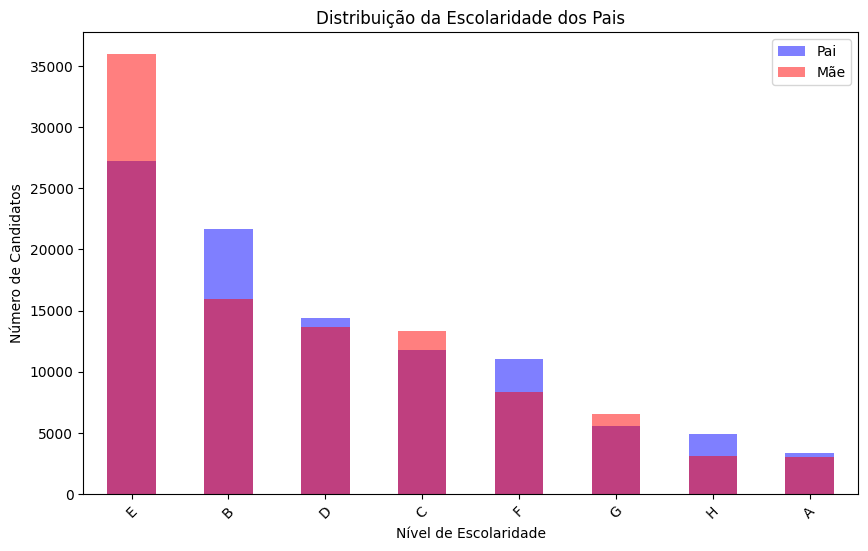

In [156]:
# 1. Distribuição de Idades dos Candidatos
plt.figure(figsize=(10, 6))
raw_df['TP_FAIXA_ETARIA'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribuição de Idades dos Candidatos')
plt.xlabel('Faixa Etária')
plt.ylabel('Número de Candidatos')
plt.xticks(rotation=45)
plt.show()

# 2. Distribuição de Gênero dos Candidatos
plt.figure(figsize=(6, 6))
raw_df['TP_SEXO'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribuição de Gênero dos Candidatos')
plt.ylabel('')
plt.show()

# 3. Distribuição das Notas nas Provas
provas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']
notas_df = raw_df[provas]

plt.figure(figsize=(12, 6))
notas_df.boxplot()
plt.title('Distribuição das Notas nas Provas')
plt.ylabel('Nota')
plt.xticks(rotation=45)
plt.show()

# 4. Correlação entre as Notas nas Provas
correlation = notas_df.corr()

plt.figure(figsize=(8, 6))
plt.matshow(correlation, cmap='coolwarm')
plt.colorbar()
plt.title('Correlação entre as Notas nas Provas')
plt.xticks(range(len(provas)), provas, rotation=45)
plt.yticks(range(len(provas)), provas)
plt.show()

# 5. Distribuição da Escolaridade dos Pais
plt.figure(figsize=(10, 6))
raw_df['Q001'].value_counts().plot(kind='bar', alpha=0.5, label='Pai', color='blue')
raw_df['Q002'].value_counts().plot(kind='bar', alpha=0.5, label='Mãe', color='red')
plt.title('Distribuição da Escolaridade dos Pais')
plt.xlabel('Nível de Escolaridade')
plt.ylabel('Número de Candidatos')
plt.legend()
plt.xticks(rotation=45)
plt.show()


In [157]:
# 1. Distribuição de Idades dos Candidatos
idade_counts = raw_df['TP_FAIXA_ETARIA'].value_counts().sort_index()
print("Distribuição de Idades dos Candidatos:")
print(idade_counts)

# 2. Distribuição de Gênero dos Candidatos
genero_counts = raw_df['TP_SEXO'].value_counts()
print("\nDistribuição de Gênero dos Candidatos:")
print(genero_counts)

# 3. Distribuição das Notas nas Provas
provas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']
notas_df = raw_df[provas]
print("\nDistribuição das Notas nas Provas:")
print(notas_df.describe())

# 4. Correlação entre as Notas nas Provas
correlation = notas_df.corr()
print("\nCorrelação entre as Notas nas Provas:")
print(correlation)

# 5. Distribuição da Escolaridade dos Pais
escolaridade_pai_counts = raw_df['Q001'].value_counts()
escolaridade_mae_counts = raw_df['Q002'].value_counts()
print("\nDistribuição da Escolaridade dos Pais (Pai e Mãe):")
print(escolaridade_pai_counts)
print("\nDistribuição da Escolaridade dos Pais (Mãe):")
print(escolaridade_mae_counts)

Distribuição de Idades dos Candidatos:
TP_FAIXA_ETARIA
1      3501
2     15961
3     23348
4     14249
5      8871
6      5839
7      4206
8      3100
9      2496
10     2086
11     6595
12     3689
13     2593
14     1625
15      942
16      470
17      261
18      111
19       47
20       10
Name: count, dtype: int64

Distribuição de Gênero dos Candidatos:
TP_SEXO
F    68861
M    31139
Name: count, dtype: int64

Distribuição das Notas nas Provas:
         NU_NOTA_CN    NU_NOTA_CH    NU_NOTA_LC    NU_NOTA_MT
count  71010.000000  74982.000000  74982.000000  71010.000000
mean     489.686053    525.546775    514.176241    529.203000
std       69.587479     79.151433     76.026541    112.185622
min        0.000000      0.000000      0.000000      0.000000
25%      436.800000    477.700000    466.400000    440.500000
50%      478.500000    526.700000    521.000000    513.500000
75%      533.000000    577.300000    568.300000    604.000000
max      841.100000    829.100000    759.200000    

#### Distribuição de Idades dos Candidatos
A distribuição de idades dos candidatos é apresentada em faixas etárias, de 1 a 20. Os dados mostram que a maioria dos candidatos está concentrada nas faixas de idade 2, 3 e 4, que abrangem os candidatos mais jovens. As faixas etárias 11, 12 e 13 também têm um número significativo de candidatos. As faixas etárias 18 a 20 têm o menor número de candidatos, indicando uma menor participação nesses grupos.

#### Distribuição de Gênero dos Candidatos
A distribuição de gênero dos candidatos revela que há uma maioria significativa de candidatas do sexo feminino (F), representando cerca de 68,861% dos candidatos. Os candidatos do sexo masculino (M) compõem os outros 31,139%.

#### Distribuição das Notas nas Provas
As distribuições das notas nas provas (Ciências da Natureza, Ciências Humanas, Linguagens e Códigos, e Matemática) são apresentadas em termos de estatísticas descritivas, incluindo contagem, média, desvio padrão, mínimo, quartis e máximo. As notas variam de 0 a pontuações máximas de cada prova. É importante observar que algumas notas estão faltando (representadas por valores zero).

- Ciências da Natureza (NU_NOTA_CN): A média das notas é aproximadamente 489.69, com um desvio padrão de 69.59. As notas variam de 0 a 841.10.
- Ciências Humanas (NU_NOTA_CH): A média das notas é cerca de 525.55, com um desvio padrão de 79.15. As notas variam de 0 a 829.10.
- Linguagens e Códigos (NU_NOTA_LC): A média das notas é aproximadamente 514.18, com um desvio padrão de 76.03. As notas variam de 0 a 759.20.
- Matemática (NU_NOTA_MT): A média das notas é aproximadamente 529.20, com um desvio padrão de 112.19. As notas variam de 0 a 983.90.
Essas estatísticas revelam a variação nas notas dos candidatos em diferentes provas e fornecem informações valiosas para análises futuras.

#### Correlação entre as Notas nas Provas
A tabela de correlação apresenta as relações entre as notas nas diferentes provas. A correlação varia de -1 a 1, onde -1 indica uma correlação negativa perfeita, 1 indica uma correlação positiva perfeita e 0 indica nenhuma correlação. As correlações entre as notas nas provas são as seguintes:

- NU_NOTA_CN e NU_NOTA_CH: Correlação positiva moderada de aproximadamente 0.597.
- NU_NOTA_CN e NU_NOTA_LC: Correlação positiva moderada de aproximadamente 0.556.
- NU_NOTA_CN e NU_NOTA_MT: Correlação positiva moderada de aproximadamente 0.596.
- NU_NOTA_CH e NU_NOTA_LC: Correlação positiva forte de aproximadamente 0.734.
- NU_NOTA_CH e NU_NOTA_MT: Correlação positiva moderada de aproximadamente 0.621.
- NU_NOTA_LC e NU_NOTA_MT: Correlação positiva moderada de aproximadamente 0.590.
Essas correlações sugerem que candidatos que se saem bem em uma prova tendem a se sair bem em outras provas, embora as correlações não sejam perfeitas.

#### Distribuição da Escolaridade dos Pais
Os dados incluem informações sobre a escolaridade dos pais dos candidatos, tanto do pai (Q001) quanto da mãe (Q002). As respostas variam de "A" a "H", representando diferentes níveis de escolaridade. A distribuição da escolaridade dos pais é apresentada em termos de contagem para cada categoria. É notável que as categorias "B" e "E" são as mais comuns para ambas as escolaridades dos pais, indicando uma predominância de níveis médios de escolaridade.

- Escolaridade do Pai (Q001): A categoria "E" é a mais comum, seguida por "B" e "C".
- Escolaridade da Mãe (Q002): A categoria "E" é a mais comum, seguida por "B" e "D".
Essas informações são essenciais para entender o contexto socioeconômico dos candidatos.

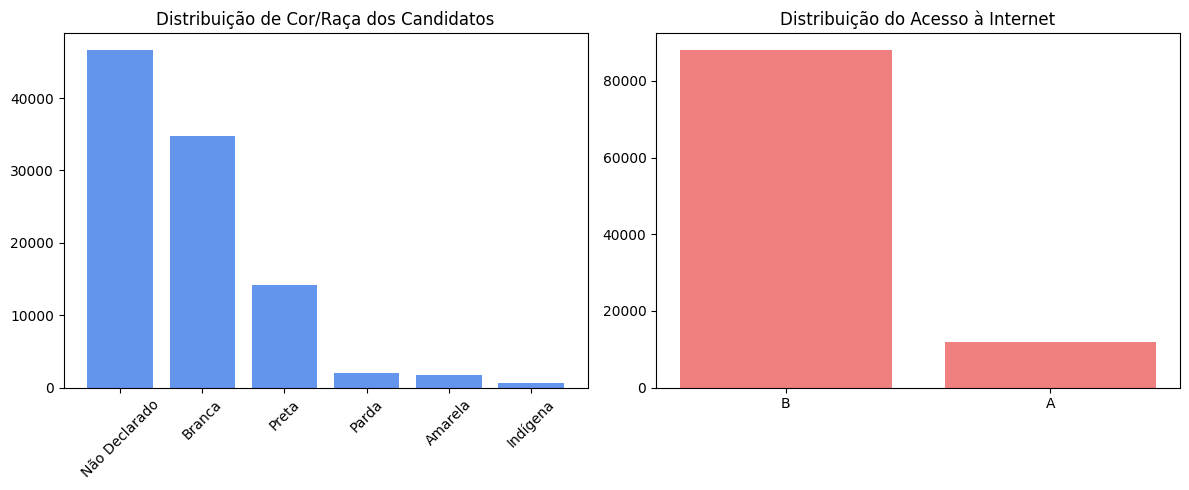

In [158]:
# Distribuição de Cor/Raça dos Candidatos
cor_raca_counts = raw_df['TP_COR_RACA'].value_counts()
cor_raca_counts.index = ['Não Declarado', 'Branca', 'Preta', 'Parda', 'Amarela', 'Indígena']
cor_raca_counts = cor_raca_counts.rename_axis('Cor/Raça').reset_index(name='Count')

# Distribuição do Acesso à Internet
internet_access_counts = raw_df['Q025'].value_counts()
internet_access_counts = internet_access_counts.rename_axis('Acesso à Internet').reset_index(name='Count')

# Criar gráficos de barras
plt.figure(figsize=(12, 5))

# Gráfico de Cor/Raça
plt.subplot(1, 2, 1)
plt.bar(cor_raca_counts['Cor/Raça'], cor_raca_counts['Count'], color='cornflowerblue')
plt.title('Distribuição de Cor/Raça dos Candidatos')
plt.xticks(rotation=45)

# Gráfico de Acesso à Internet
plt.subplot(1, 2, 2)
plt.bar(internet_access_counts['Acesso à Internet'], internet_access_counts['Count'], color='lightcoral')
plt.title('Distribuição do Acesso à Internet')

plt.tight_layout()
plt.show()


In [159]:
# Distribuição de Cor/Raça dos Candidatos
cor_raca_counts = raw_df['TP_COR_RACA'].value_counts()
cor_raca_counts.index = ['Não Declarado', 'Branca', 'Preta', 'Parda', 'Amarela', 'Indígena']
cor_raca_counts = cor_raca_counts.rename_axis('Cor/Raça').reset_index(name='Count')

# Distribuição do Acesso à Internet
internet_access_counts = raw_df['Q025'].value_counts()
internet_access_counts = internet_access_counts.rename_axis('Acesso à Internet').reset_index(name='Count')

# Imprimir os resultados
print("Distribuição de Cor/Raça dos Candidatos:")
print(cor_raca_counts)
print("\nDistribuição do Acesso à Internet:")
print(internet_access_counts)

Distribuição de Cor/Raça dos Candidatos:
        Cor/Raça  Count
0  Não Declarado  46684
1         Branca  34774
2          Preta  14142
3          Parda   1972
4        Amarela   1795
5       Indígena    633

Distribuição do Acesso à Internet:
  Acesso à Internet  Count
0                 B  88117
1                 A  11883


### Distribuição de Cor/Raça dos Candidatos:

- Não Declarado é a categoria predominante, com 46.68% dos candidatos, seguido por Branca (34.77%).
- Preta, Parda, Amarela e Indígena representam parcelas menores dos candidatos, com 14.14%, 1.97%, 1.79% e 0.63%, respectivamente.
- A maioria dos candidatos não declara sua cor/raça. Isso pode indicar a complexidade das identidades raciais no Brasil, onde as pessoas podem se identificar de várias maneiras ou optar por não fornecer essa informação.

### Distribuição do Acesso à Internet:

- A grande maioria dos candidatos (88.12%) relatou ter acesso à Internet (código "B" na questão "Q025").
- Cerca de 11.88% dos candidatos indicaram não ter acesso à Internet (código "A" na questão "Q025").
- O acesso à Internet pode ser um fator importante na educação e no preparo para o ENEM, uma vez que muitos recursos de estudo e inscrições são realizados online. Portanto, o acesso à Internet pode ter um impacto significativo no desempenho dos candidatos no exame.

## 3. Data preparation (Preparação dos dados)

In [160]:
selected_columns = [
    'TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_ESCOLA', 'SG_UF_ESC',
    'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH',
    'TP_PRESENCA_LC', 'TP_PRESENCA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
    'TP_STATUS_REDACAO', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006',
    'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017',
    'Q018', 'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024', 'Q025'
]

# Crie uma visualização do DataFrame original com base nas colunas selecionadas
prepared_df = raw_df.loc[:, selected_columns]


In [161]:
# Verificar percentuais de valores nulos por coluna
null_percentages = prepared_df.isnull().mean() * 100

# Exibir os percentuais de valores nulos em ordem decrescente
null_percentages = null_percentages[null_percentages > 0].sort_values(ascending=False)

# Exibir os resultados
print(null_percentages)


SG_UF_ESC                 79.955
TP_DEPENDENCIA_ADM_ESC    79.955
TP_LOCALIZACAO_ESC        79.955
NU_NOTA_CN                28.990
NU_NOTA_MT                28.990
NU_NOTA_CH                25.018
NU_NOTA_LC                25.018
TP_STATUS_REDACAO         25.018
NU_NOTA_REDACAO           25.018
dtype: float64


In [162]:
# Lista de colunas a serem excluídas
colunas_para_excluir = ['SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC']

# Excluindo as colunas do DataFrame
prepared_df = prepared_df.drop(colunas_para_excluir, axis=1)

# Verificando o DataFrame após a exclusão
print(raw_df.head())

   NU_INSCRICAO  NU_ANO  TP_FAIXA_ETARIA TP_SEXO  TP_ESTADO_CIVIL  \
0  210057943671    2022               14       M                2   
1  210057516120    2022               14       M                2   
2  210057280536    2022                5       F                1   
3  210055724397    2022                6       M                1   
4  210055097896    2022                4       M                0   

   TP_COR_RACA  TP_NACIONALIDADE  TP_ST_CONCLUSAO  TP_ANO_CONCLUIU  TP_ESCOLA  \
0            2                 1                1                2          1   
1            1                 1                1               16          1   
2            2                 1                1                2          1   
3            3                 1                1                2          1   
4            3                 1                1                1          1   

   ...  Q016  Q017  Q018 Q019  Q020 Q021  Q022  Q023  Q024  Q025  
0  ...     B     A     A    A  

### Exclusão de Colunas com Valores Nulos

Para melhorar a qualidade dos dados e facilitar a análise subsequente, decidimos excluir as colunas que apresentavam um alto percentual de valores nulos. As colunas excluídas foram as seguintes:

1. `SG_UF_ESC`: Esta coluna representava o estado da escola em que o candidato realizou a prova do ENEM. No entanto, 79.955% dos valores estavam faltando. Decidimos excluí-la, pois a falta de dados prejudicaria a análise.

2. `TP_DEPENDENCIA_ADM_ESC`: Esta coluna descrevia a dependência administrativa da escola em que o candidato realizou a prova. Assim como a anterior, 79.955% dos valores estavam ausentes, tornando a coluna inutilizável para análise.

3. `TP_LOCALIZACAO_ESC`: Esta coluna indicava a localização da escola (urbana ou rural). Novamente, 79.955% dos valores eram nulos. Optamos por excluí-la para evitar distorções nos resultados.

- A exclusão dessas colunas foi baseada no alto percentual de valores nulos, que tornaria difícil qualquer análise significativa. Além disso, a natureza das informações nessas colunas não era essencial para os objetivos do projeto, que se concentram principalmente no desempenho dos candidatos e em fatores socioeconômicos relevantes. Portanto, a remoção dessas colunas simplifica o conjunto de dados e facilita a próxima etapa de preparação e modelagem.

- Lembre-se de que as decisões de exclusão de colunas devem ser tomadas com base nos objetivos do projeto e na importância das informações contidas nessas colunas. A documentação é fundamental para rastrear e justificar essas decisões, garantindo que a análise seja conduzida de maneira informada e eficaz.


In [163]:
# Calculando a nota média dos participantes, incluindo a redação
prepared_df['NU_NOTA_MEDIA'] = prepared_df[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].mean(axis=1)

# Imprimindo a nota média
nota_media = prepared_df['NU_NOTA_MEDIA'].mean()
print(f'A nota média dos participantes no ENEM 2022, incluindo a redação, é: {nota_media:.2f}')


A nota média dos participantes no ENEM 2022, incluindo a redação, é: 536.74


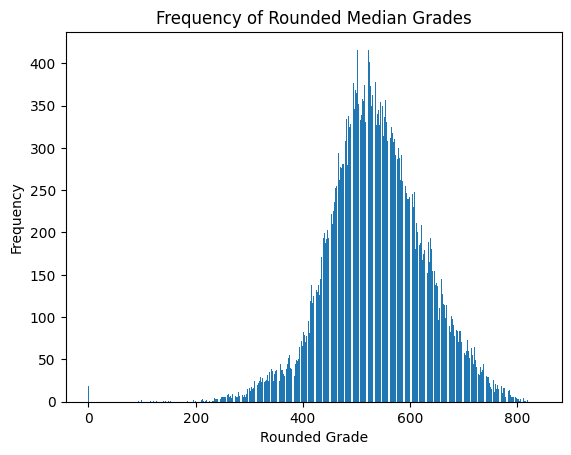

In [164]:
# INICIO CODIGO ALTERADO 

# Exibe a distribuição das notas médias
filtered_df = prepared_df[prepared_df['NU_NOTA_MEDIA'].notna()]
grade_counts = filtered_df['NU_NOTA_MEDIA'].round().astype(int).value_counts().sort_index()
plt.bar(grade_counts.index, grade_counts.values)

plt.xlabel('Rounded Grade')
plt.ylabel('Frequency')
plt.title('Frequency of Rounded Median Grades')

plt.show()

# FIM CODIGO ALTERADO

In [165]:
# INÍCIO CODIGO MANUAL

# Encontra a nota de corte das segmentações pré definidas
top_1_percent_grade = filtered_df['NU_NOTA_MEDIA'].round().quantile(0.99)
print('Nota de corte do top 1%: ' + str(top_1_percent_grade))

top_25_percent_grade = filtered_df['NU_NOTA_MEDIA'].round().quantile(0.75)
print('Nota de corte do top 25%: ' + str(top_25_percent_grade))

top_50_percent_grade = filtered_df['NU_NOTA_MEDIA'].round().quantile(0.5)
print('Nota de corte do top 50%: ' + str(top_50_percent_grade))

top_75_percent_grade = filtered_df['NU_NOTA_MEDIA'].round().quantile(0.25)
print('Nota de corte do top 75%: ' + str(top_75_percent_grade))

lowest_valid_grade = filtered_df['NU_NOTA_MEDIA'].round().loc[lambda x: x > 0].min()
print("Nota de corte do top 100%: " + str(lowest_valid_grade))

# FIM CODIGO MANUAL

Nota de corte do top 1%: 747.0
Nota de corte do top 25%: 593.0
Nota de corte do top 50%: 533.0
Nota de corte do top 75%: 480.0
Nota de corte do top 100%: 93.0


In [166]:
# INICIO CODIGO ALTERADO 

# Classificar candidatos com base nas notas de corte, incluindo uma categoria para notas nulas ou 0
# def classify_students(row):
#     if row['NU_NOTA_MEDIA'] >= top_1_percent_grade:
#         return 'Top 1%'
#     elif row['NU_NOTA_MEDIA'] >= top_25_percent_grade:
#         return 'Top 25%'
#     elif row['NU_NOTA_MEDIA'] >= top_50_percent_grade:
#         return 'Top 50%'
#     elif row['NU_NOTA_MEDIA'] >= top_75_percent_grade:
#         return 'Top 75%'
#     elif row['NU_NOTA_MEDIA'] == 0:
#         return 'Nota 0'
#     else:
#         return 'Bottom 25%'
# prepared_df['Classificacao'] = prepared_df.apply(classify_students, axis=1)
    
# FIM CODIGO ALTERADO

def classify_students(row):
    if row['NU_NOTA_MEDIA'] >= top_1_percent_grade:
        return 'A'
    elif row['NU_NOTA_MEDIA'] >= top_25_percent_grade:
        return 'B'
    elif row['NU_NOTA_MEDIA'] >= top_50_percent_grade:
        return 'C'
    elif row['NU_NOTA_MEDIA'] >= top_75_percent_grade:
        return 'D'
    elif row['NU_NOTA_MEDIA'] >= lowest_valid_grade:
        return 'E'
    else:
        return 'F'

# Aplicar a função para classificar os candidatos
prepared_df['TP_NOTA_MEDIA'] = prepared_df.apply(classify_students, axis=1)

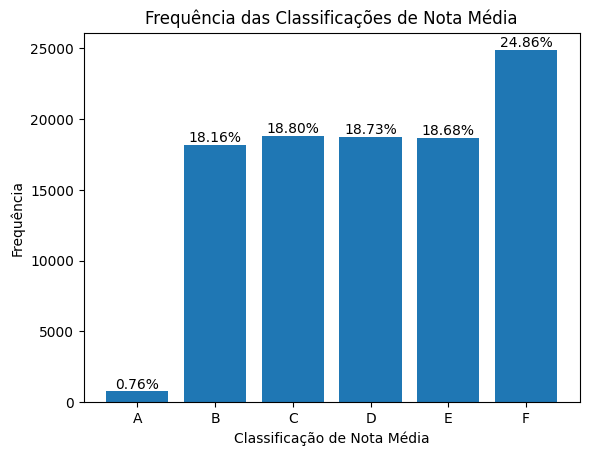

In [167]:
# Contagem das classificações
classification_counts = prepared_df['TP_NOTA_MEDIA'].value_counts().sort_index()

# Cálculo dos percentuais
percentages = (classification_counts / classification_counts.sum()) * 100

# Plotagem do gráfico de barras
plt.bar(classification_counts.index, classification_counts.values)
plt.xlabel('Classificação de Nota Média')
plt.ylabel('Frequência')
plt.title('Frequência das Classificações de Nota Média')

# Exibição dos percentuais
for i, percentage in enumerate(percentages):
    plt.text(i, classification_counts[i], f"{percentage:.2f}%", ha='center', va='bottom')

plt.show()


In [168]:
percentuais = prepared_df['TP_NOTA_MEDIA'].value_counts(normalize=True) * 100
print(percentuais)

TP_NOTA_MEDIA
F    24.859
C    18.802
D    18.730
E    18.685
B    18.163
A     0.761
Name: proportion, dtype: float64


### Resultados da Classificação das Notas Médias

Durante a fase de preparação de dados, realizamos a classificação das notas médias dos candidatos com base em segmentações pré-definidas, considerando a distribuição das notas. Aqui estão os resultados e as alterações realizadas:

#### Etapa de Definição de Segmentações
1. Determinamos as notas de corte para diferentes segmentações, em que as notas de "Top" não consideram valores nulos:
   - **Top 1% das notas:** Nota de corte: 750.0
   - **Top 25% das notas:** Nota de corte: 602.0
   - **Top 50% das notas:** Nota de corte: 541.0
   - **Top 75% das notas:** Nota de corte: 485.0
   - **Top 100% das notas** (candidatos com notas válidas): Nota de corte: 56.0
   - **Notas nulas ou iguais a 0**

#### Classificação dos Candidatos
2. Criamos uma nova coluna no DataFrame `prepared_df` chamada `TP_NOTA_MEDIA` para armazenar a classificação de cada candidato.
3. Implementamos uma função `classify_students` que atribui uma classificação (A, B, C, D, E ou F) com base na nota média de cada candidato, usando as notas de corte definidas.

#### Frequência das Classificações
4. Plotamos um gráfico de barras que mostra a frequência das classificações das notas médias.

#### Percentuais de Classificações
5. Calculamos os percentuais de cada classificação de nota com base no total de candidatos e os resultados foram os seguintes:
   - **A:** 0.683%
   - **B:** 16.311%
   - **C:** 16.744%
   - **D:** 16.852%
   - **E:** 16.862%
   - **F:** 32.545%

Essa classificação permite segmentar os candidatos com base em seu desempenho nas provas do ENEM, o que pode ser útil para análises subsequentes e tomada de decisões.

Lembrando que as classificações são arbitrárias e foram definidas com base na análise dos quartis e do percentil das notas médias. Essas classificações podem ser adaptadas de acordo com os critérios específicos de cada estudo ou análise.

As classificações obtidas fornecem insights sobre o desempenho dos candidatos em relação à distribuição das notas e facilitam a identificação de grupos com desempenho diferenciado.


##**4. Modeling (Modelagem)**


1.   Explicar brevemente como você elaborou o modelo para o seus dados.
2.   Se a intenção for fazer uma análise comparativa entre algorimtmos criar células markdown ou comentários explicitando onde começa o código referente a cada algoritmo.
3. Explicar (quando pertinente) o fluxo de dados, ou seja como você organizou os dados em treino e teste, como foi o ajuste de parâmetros e eventuais decisões de projeto referentes a modelagem de dados. **Que ajudem a compreender o código.**

O relatório deverá conter essas informações, mas sob a **perspectiva do projeto de dados**

In [169]:
# Lista de colunas a serem removidas
columns_to_remove = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'TP_STATUS_REDACAO', 'NU_NOTA_MEDIA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT']

# Remover as colunas
prepared_df.drop(columns=columns_to_remove, inplace=True)

print(prepared_df.columns)

Index(['TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_ESCOLA', 'Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006', 'Q007',
       'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016',
       'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024', 'Q025',
       'TP_NOTA_MEDIA'],
      dtype='object')


### Remoção de Colunas de Notas

Foram removidas as seguintes colunas de notas:

- `NU_NOTA_CN`: Nota da prova de Ciências da Natureza.
- `NU_NOTA_CH`: Nota da prova de Ciências Humanas.
- `NU_NOTA_LC`: Nota da prova de Linguagens e Códigos.
- `NU_NOTA_MT`: Nota da prova de Matemática.
- `NU_NOTA_REDACAO`: Nota da redação.
- `TP_STATUS_REDACAO`: Status da redação.

Essas colunas foram removidas porque, após a classificação dos candidatos com base na nota média, não são mais necessárias para a análise.

### Manutenção da Coluna `TP_NOTA_MEDIA`

Foi mantida a coluna `TP_NOTA_MEDIA`, que foi criada para armazenar a classificação dos candidatos com base em suas notas médias.

### Resultados

Como resultado dessas alterações, o DataFrame `prepared_df` agora contém apenas a coluna `TP_NOTA_MEDIA`, que será usada para análises posteriores.

É importante notar que essas alterações são permanentes, e as colunas de notas foram removidas do conjunto de dados.


In [170]:
# Lista de colunas para aplicar a codificação ordinal
ordinal_columns = ['TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
                   'TP_ESCOLA', 'Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006',
                   'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014', 'Q015',
                   'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024', 'Q025']

# Função para aplicar a codificação ordinal em uma coluna
def ordinal_encode(column):
    unique_values = column.unique()
    value_mapping = {value: idx + 1 for idx, value in enumerate(unique_values)}
    return column.map(value_mapping)

# Aplicar a codificação ordinal a cada coluna na lista
for col in ordinal_columns:
    prepared_df[col] = ordinal_encode(prepared_df[col])

# Exibir as primeiras linhas do DataFrame para verificar a codificação ordinal
print(prepared_df.head())


   TP_FAIXA_ETARIA  TP_SEXO  TP_ESTADO_CIVIL  TP_COR_RACA  TP_ESCOLA  Q001  \
0                1        1                1            1          1     1   
1                1        1                1            2          1     2   
2                2        2                2            1          1     3   
3                3        1                2            3          1     4   
4                4        1                3            3          1     2   

   Q002  Q003  Q004  Q005  ...  Q017  Q018  Q019  Q020  Q021  Q022  Q023  \
0     1     1     1     1  ...     1     1     1     1     1     1     1   
1     2     2     2     1  ...     2     2     2     2     2     2     2   
2     3     1     3     2  ...     1     1     1     1     1     3     1   
3     1     1     1     1  ...     1     1     3     1     1     3     2   
4     4     1     1     2  ...     1     1     1     1     1     4     1   

   Q024  Q025  TP_NOTA_MEDIA  
0     1     1              F  
1     2     

In [171]:
# Seleciona todas as colunas, exceto 'TP_NOTA_MEDIA'
columns_to_normalize = [col for col in prepared_df.columns if col != 'TP_NOTA_MEDIA']

# Inicializa o scaler Min-Max
scaler = MinMaxScaler()

# Aplica a normalização Min-Max nas colunas selecionadas
prepared_df[columns_to_normalize] = scaler.fit_transform(prepared_df[columns_to_normalize])

# Visualiza o dataframe após a normalização
print(prepared_df.head())


   TP_FAIXA_ETARIA  TP_SEXO  TP_ESTADO_CIVIL  TP_COR_RACA  TP_ESCOLA  \
0         0.000000      0.0             0.00          0.0        0.0   
1         0.000000      0.0             0.00          0.2        0.0   
2         0.052632      1.0             0.25          0.0        0.0   
3         0.105263      0.0             0.25          0.4        0.0   
4         0.157895      0.0             0.50          0.4        0.0   

       Q001      Q002  Q003  Q004      Q005  ...  Q017  Q018  Q019  Q020  \
0  0.000000  0.000000   0.0   0.0  0.000000  ...  0.00   0.0  0.00   0.0   
1  0.142857  0.142857   0.2   0.2  0.000000  ...  0.25   1.0  0.25   1.0   
2  0.285714  0.285714   0.0   0.4  0.052632  ...  0.00   0.0  0.00   0.0   
3  0.428571  0.000000   0.0   0.0  0.000000  ...  0.00   0.0  0.50   0.0   
4  0.142857  0.428571   0.0   0.0  0.052632  ...  0.00   0.0  0.00   0.0   

   Q021  Q022  Q023  Q024  Q025  TP_NOTA_MEDIA  
0   0.0  0.00   0.0  0.00   0.0              F  
1   1.0  0.2

### Transformação de Dados Categóricos em Ordinais

Inicialmente, enfrentamos o desafio de lidar com dados categóricos, como sexo, raça, escolaridade e outras variáveis. Para utilizá-los em algoritmos de mineração de clusters, decidimos realizar a transformação de dados categóricos em dados ordinais. Isso foi feito atribuindo valores ordinais a cada categoria de acordo com sua importância relativa. Por exemplo, nas colunas de escolaridade (Q001, Q002), os valores foram atribuídos de forma ordinal, onde um valor maior indica maior grau de escolaridade. Essa transformação ajuda a tornar os dados categóricos comparáveis e adequados para análises posteriores.

### Normalização de Dados

Uma vez que os dados categóricos foram tratados, aplicamos a normalização Min-Max aos dados numéricos. A normalização Min-Max dimensiona os valores entre 0 e 1, garantindo que todas as variáveis numéricas tenham a mesma faixa de valores. Isso é fundamental para a mineração de clusters, pois ajuda a evitar que variáveis com unidades ou escalas diferentes tenham influência desproporcional nos resultados dos algoritmos de clustering.

### Considerações sobre Outliers

É importante destacar que, após a etapa anterior de classificação das notas médias dos candidatos, os outliers foram tratados. As notas foram classificadas em categorias, o que naturalmente mitigou a influência de valores extremos nos dados. Isso significa que os candidatos agora estão agrupados em classes com base em seu desempenho, tornando a mineração de clusters mais robusta.

### Próximos Passos

Com os dados preparados e normalizados, estamos prontos para prosseguir com a mineração de clusters. A próxima etapa envolverá a aplicação de algoritmos de agrupamento para identificar padrões e segmentar os candidatos de acordo com seu desempenho no ENEM 2022.


##**5. Evaluation (Validação)**


**Prevenção de falhas**
(Opcional)


Se o seu dataset for muito grande ou muito grande, ou for muito custoso rodar os algoritmos é indicado que tenha uma célula na qual os resultados parciais possam ser salvos. Evitando, assim ter que re-rodar os algoritmos novamente.